# Loading packages

In [1]:
#pip install geopandas
#!pip install plotly-geo
#!pip install geopandas==0.3.0
#!pip install pyshp==1.2.10


In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import cross_val_score
warnings.simplefilter("ignore")
import seaborn as sns
sns.set() 
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(tree, feature_names):
    dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, 
                         impurity=False,
                         rounded=True,  
                         special_characters=True)  
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import geopandas as gpd
import plotly.figure_factory as ff

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [4]:
# for mapping
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

counties["features"][0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01001',
  'STATE': '01',
  'COUNTY': '001',
  'NAME': 'Autauga',
  'LSAD': 'County',
  'CENSUSAREA': 594.436},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]]},
 'id': '01001'}

# Exploring the Data

In [5]:
#df = pd.read_csv('Clean Demographic Data File.csv')
df = pd.read_excel (r'/Users/amankewalramani/Desktop/Sci4GA/Clean Demographic Data File for Import.xlsx')

In [6]:
df.head()

,State,County,Longitude,Lat,HOUSEHOLDS WITH INTERNET ACCESS (2014-2018),HYPERTIONSION DIAGNOSIS IN ADULTS (2017),HEART DISEASE DIAGNOSIS IN ADULTS (2017),DIABETES DIAGNOSIS FOR ADULTS (2017),HIGH CHOLESTEROL DIAGNOSIS IN ADULTS (2017),"CANCER INCIDENCE PER 100,000 PEOPLE (2011-2015)",...,Mental Health Providers Radio (County Health Rankings 2017),Percent Diabetic (County Health Rankings 2017),Percent of Children living in Poverty (County Health Rankings 2017),Air Quality - Avg Daily PM2.5 (CountyHealthRankings 2017),Percent who Drive Alone to Work (County Health Rankings 2017),Percent of those who drive alone and have a long comute (County Health Rankings 2017),Number with HIV (County Health Rankings 2017),Percent lving in food insecurity (Country Health Rankings 2017),Percent with limited access to food (County Health Rankings 2017),Percent of Children eligible for Free or Reduced Price Lunch (County Health Rankings 2017)
0,Georgia,Appling,-82.289091,31.748472,66.22,34.6,4.7,11.8,31.3,392.8,...,3076:1,12.9,34.2,9.2,80.589751,22.8,22.0,17.1,5.840547,67.895879
1,Georgia,Atkinson,-82.875459,31.296335,61.47,31.5,3.8,10.9,29.4,424.4,...,NaN,11.5,40.5,9.3,78.306403,27.9,23.0,15.0,10.924855,84.855628
2,Georgia,Bacon,-82.459365,31.554565,67.65,33.4,4.5,11.0,30.6,446.2,...,NaN,10.4,36.8,9.1,79.338300,21.6,38.0,15.2,2.729978,64.990602
3,Georgia,Baker,-84.442188,31.326699,51.62,40.1,4.9,14.4,32.9,453.4,...,3180:1,14.8,41.9,9.8,85.416667,38.1,47.0,20.6,43.512533,99.101796
4,Georgia,Baldwin,-83.247017,33.068823,75.62,33.3,3.8,10.8,27.7,459.6,...,798:1,14.0,35.5,10.6,83.548796,22.8,231.0,23.9,8.578306,88.469149


In [7]:
#df1.head()

In [8]:
df.shape

(166, 128)

In [9]:
#df1.shape

# Common Columns - just join them 

In [10]:
#a = np.intersect1d(df.columns, df1.columns)

In [11]:
#print ("Common Columns:",a)



# Merging Both of the Data Sets

In [12]:
#df = pd.merge(df, df1, how="outer", left_on='County', right_on='County')


In [13]:
df.tail(50)

,State,County,Longitude,Lat,HOUSEHOLDS WITH INTERNET ACCESS (2014-2018),HYPERTIONSION DIAGNOSIS IN ADULTS (2017),HEART DISEASE DIAGNOSIS IN ADULTS (2017),DIABETES DIAGNOSIS FOR ADULTS (2017),HIGH CHOLESTEROL DIAGNOSIS IN ADULTS (2017),"CANCER INCIDENCE PER 100,000 PEOPLE (2011-2015)",...,Mental Health Providers Radio (County Health Rankings 2017),Percent Diabetic (County Health Rankings 2017),Percent of Children living in Poverty (County Health Rankings 2017),Air Quality - Avg Daily PM2.5 (CountyHealthRankings 2017),Percent who Drive Alone to Work (County Health Rankings 2017),Percent of those who drive alone and have a long comute (County Health Rankings 2017),Number with HIV (County Health Rankings 2017),Percent lving in food insecurity (Country Health Rankings 2017),Percent with limited access to food (County Health Rankings 2017),Percent of Children eligible for Free or Reduced Price Lunch (County Health Rankings 2017)
116,Georgia,Putnam,-83.375529,33.320561,77.56,38.2,5.4,13.3,33.7,461.0,...,3050:1,12.8,33.1,10.6,80.456274,32.6,8.0,16.1,1.371611,75.720897
117,Georgia,Quitman,-85.017732,31.867281,59.10,43.7,5.9,15.7,36.1,532.3,...,NaN,16.9,47.9,9.7,74.931880,31.0,8.0,22.5,23.336406,100.000000
118,Georgia,Rabun,-83.403046,34.883894,73.20,36.8,5.9,12.4,35.2,496.3,...,708:1,13.0,28.1,8.5,77.077836,22.2,5.0,14.5,0.145690,66.119734
119,Georgia,Randolph,-84.757324,31.766228,72.29,43.3,5.4,16.1,33.0,405.3,...,1439:1,16.7,44.1,9.8,68.916734,16.3,15.0,26.3,3.323922,90.300679
120,Georgia,Richmond,-82.070264,33.357771,77.12,35.1,3.7,12.1,28.1,448.9,...,397:1,13.5,37.7,11.2,81.362132,20.1,1213.0,24.1,12.503365,96.767613
121,Georgia,Rockdale,-84.022022,33.651450,84.15,35.6,3.8,11.6,29.7,453.4,...,966:1,13.1,26.0,10.7,76.428864,46.9,115.0,18.1,13.331195,68.267477
122,Georgia,Schley,-84.312589,32.265402,71.98,35.0,4.3,12.0,31.7,398.1,...,NaN,12.6,29.0,10.2,81.471816,35.7,8.0,17.9,0.534430,55.635838
123,Georgia,Screven,-81.607794,32.749765,71.60,38.7,5.0,13.6,31.8,481.0,...,3541:1,13.6,40.0,9.6,84.381414,41.2,29.0,21.8,9.231376,81.382528
124,Georgia,Seminole,-84.868239,30.934648,65.92,40.0,5.6,14.1,34.1,421.2,...,4324:1,14.2,42.7,9.3,77.945723,35.6,13.0,18.8,2.958268,92.228294
125,Georgia,Spalding,-84.280140,33.263100,73.22,35.2,4.3,11.4,30.6,514.2,...,1186:1,12.9,35.5,10.5,85.113904,43.9,89.0,20.3,7.037007,76.580103


In [14]:
# these were all just na values that came because of the merge 

df.drop(df.tail(7).index,
      inplace = True)

# EDA and Univariate Exploration

In [15]:
df.shape

(159, 128)

In [16]:
pd.set_option('display.max_columns', None)


In [17]:
df.head()

,State,County,Longitude,Lat,HOUSEHOLDS WITH INTERNET ACCESS (2014-2018),HYPERTIONSION DIAGNOSIS IN ADULTS (2017),HEART DISEASE DIAGNOSIS IN ADULTS (2017),DIABETES DIAGNOSIS FOR ADULTS (2017),HIGH CHOLESTEROL DIAGNOSIS IN ADULTS (2017),"CANCER INCIDENCE PER 100,000 PEOPLE (2011-2015)",DEPRESSION DIAGNOSIS RATE (2017),HIV DIAGNOSIS RATE (2016),RELIGIOUS ADHERENCE RATE (2010),VOTING AGE POPULATION TURNOUT RATE IN 2016 GENERAL ELECTION,PERCENTAGE VOTE FOR A DEMOCRAT IN 2016 SENATE ELECTION,PERCENTAGE VOTE FOR A REPUBLICAN IN 2016 SENATE ELECTION,TOTAL POPULATION (ACS 2014-2018),TOTAL POPULATION MALE (ACS 2014-2018),TOTAL POPULATION FEMALE (ACS 2014-2018),Under 5 Years - AGE RATE (ACS 2014-2018),5 to 9 Years - AGE RATE (ACS 2014-2018),10 to 14 Years - AGE RATE (ACS 2014-2018),15 to 17 Years- AGE RATE (ACS 2014-2018),18 to 24 Years - AGE RATE (ACS 2014-2018),25 to 34 Years- AGE RATE (ACS 2014-2018),35 to 44 Years - AGE RATE (ACS 2014-2018),45 to 54 Years- AGE RATE (ACS 2014-2018),55 to 64 Years - AGE RATE (ACS 2014-2018),65 to 74 Years - AGE RATE (ACS 2014-2018),75 to 84 Years- AGE RATE (ACS 2014-2018),85 Years and Over - AGE RATE (ACS 2014-2018),White Alone - RACE RATE (ACS 2014-2018),Black or African American Alone- RACE RATE (ACS 2014-2018),American Indian and Alaska Native Alone- RACE RATE (ACS 2014-2018),Asian Alone- RACE RATE (ACS 2014-2018),Native Hawaiian and Other Pacific Islander Alone- RACE RATE (ACS 2014-2018),Some Other Race Alone- RACE RATE (ACS 2014-2018),Two or More Races- RACE RATE (ACS 2014-2018),Population 16 Years and Over- EMPLOYMENT RATE (ACS 2014-2018),In Labor Force- EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- EMPLOYMENT RATE (ACS 2014-2018),Civilian:- EMPLOYMENT RATE (ACS 2014-2018),Employed- MALE EMPLOYMENT RATE (ACS 2014-2018),Unemployed- EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- EMPLOYMENT RATE (ACS 2014-2018),Male Population 16 Years and Over- MALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force:- MALE EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- MALE EMPLOYMENT RATE (ACS 2014-2018),Civilian:- MALE EMPLOYMENT RATE (ACS 2014-2018),Employed- MALE EMPLOYMENT RATE (ACS 2014-2018)2,Unemployed- MALE EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- MALE EMPLOYMENT RATE (ACS 2014-2018),Female Population 16 Years and Over:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Civilian:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Employed- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Unemployed- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force 16 Years and Over: LABOR FORCE RATE (ACS 2014-2018),In Armed Forces: LABOR FORCE RATE (ACS 2014-2018),Civilian: LABOR FORCE RATE (ACS 2014-2018),Civilian Population in Labor Force 16 Years and Over:- LABOR FORCE RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Employed- EMPLOYMENT RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Unemployed- UNEMPLOYMENT RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Households:-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018),"Less than $10,000-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$10,000 to $14,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$15,000 to $19,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$20,000 to $24,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$25,000 to $29,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$30,000 to $34,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$35,000 to $39,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$40,000 to $44,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$45,000 to $49,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$50,0

In [18]:
df.dtypes

State                                                                                          object
County                                                                                         object
Longitude                                                                                     float64
Lat                                                                                           float64
HOUSEHOLDS WITH INTERNET ACCESS (2014-2018)                                                   float64
                                                                                               ...   
Percent of those who drive alone and have a long comute (County Health Rankings 2017)         float64
Number with HIV (County Health Rankings 2017)                                                 float64
Percent lving in food insecurity (Country Health Rankings 2017)                               float64
Percent with limited access to food (County Health Rankings 2017)                 

In [19]:
df.describe()

,Longitude,Lat,HOUSEHOLDS WITH INTERNET ACCESS (2014-2018),HYPERTIONSION DIAGNOSIS IN ADULTS (2017),HEART DISEASE DIAGNOSIS IN ADULTS (2017),DIABETES DIAGNOSIS FOR ADULTS (2017),HIGH CHOLESTEROL DIAGNOSIS IN ADULTS (2017),"CANCER INCIDENCE PER 100,000 PEOPLE (2011-2015)",DEPRESSION DIAGNOSIS RATE (2017),HIV DIAGNOSIS RATE (2016),RELIGIOUS ADHERENCE RATE (2010),VOTING AGE POPULATION TURNOUT RATE IN 2016 GENERAL ELECTION,PERCENTAGE VOTE FOR A DEMOCRAT IN 2016 SENATE ELECTION,PERCENTAGE VOTE FOR A REPUBLICAN IN 2016 SENATE ELECTION,TOTAL POPULATION (ACS 2014-2018),TOTAL POPULATION MALE (ACS 2014-2018),TOTAL POPULATION FEMALE (ACS 2014-2018),Under 5 Years - AGE RATE (ACS 2014-2018),5 to 9 Years - AGE RATE (ACS 2014-2018),10 to 14 Years - AGE RATE (ACS 2014-2018),15 to 17 Years- AGE RATE (ACS 2014-2018),18 to 24 Years - AGE RATE (ACS 2014-2018),25 to 34 Years- AGE RATE (ACS 2014-2018),35 to 44 Years - AGE RATE (ACS 2014-2018),45 to 54 Years- AGE RATE (ACS 2014-2018),55 to 64 Years - AGE RATE (ACS 2014-2018),65 to 74 Years - AGE RATE (ACS 2014-2018),75 to 84 Years- AGE RATE (ACS 2014-2018),85 Years and Over - AGE RATE (ACS 2014-2018),White Alone - RACE RATE (ACS 2014-2018),Black or African American Alone- RACE RATE (ACS 2014-2018),American Indian and Alaska Native Alone- RACE RATE (ACS 2014-2018),Asian Alone- RACE RATE (ACS 2014-2018),Native Hawaiian and Other Pacific Islander Alone- RACE RATE (ACS 2014-2018),Some Other Race Alone- RACE RATE (ACS 2014-2018),Two or More Races- RACE RATE (ACS 2014-2018),Population 16 Years and Over- EMPLOYMENT RATE (ACS 2014-2018),In Labor Force- EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- EMPLOYMENT RATE (ACS 2014-2018),Civilian:- EMPLOYMENT RATE (ACS 2014-2018),Employed- MALE EMPLOYMENT RATE (ACS 2014-2018),Unemployed- EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- EMPLOYMENT RATE (ACS 2014-2018),Male Population 16 Years and Over- MALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force:- MALE EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- MALE EMPLOYMENT RATE (ACS 2014-2018),Civilian:- MALE EMPLOYMENT RATE (ACS 2014-2018),Employed- MALE EMPLOYMENT RATE (ACS 2014-2018)2,Unemployed- MALE EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- MALE EMPLOYMENT RATE (ACS 2014-2018),Female Population 16 Years and Over:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Civilian:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Employed- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Unemployed- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force 16 Years and Over: LABOR FORCE RATE (ACS 2014-2018),In Armed Forces: LABOR FORCE RATE (ACS 2014-2018),Civilian: LABOR FORCE RATE (ACS 2014-2018),Civilian Population in Labor Force 16 Years and Over:- LABOR FORCE RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Employed- EMPLOYMENT RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Unemployed- UNEMPLOYMENT RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Households:-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018),"Less than $10,000-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$10,000 to $14,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$15,000 to $19,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$20,000 to $24,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$25,000 to $29,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$30,000 to $34,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$35,000 to $39,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$40,000 to $44,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$45,000 to $49,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$50,000 to $59,999

## Univariate Analysis: Access to Healthy Food

In [20]:
#df['Persons with Limited Access to Healthy Foods'] = list(map(lambda x: x[:-1], df['Persons with Limited Access to Healthy Foods'].values))

In [21]:
df['Persons with Limited Access to Healthy Foods'] = [float(x) for x in df['Persons with Limited Access to Healthy Foods'].values]


In [22]:
df['Persons with Limited Access to Healthy Foods'] = 100 * df['Persons with Limited Access to Healthy Foods']

Text(0.5, 1.0, 'Distributional data of Access to Healthy Food as a Percentage')

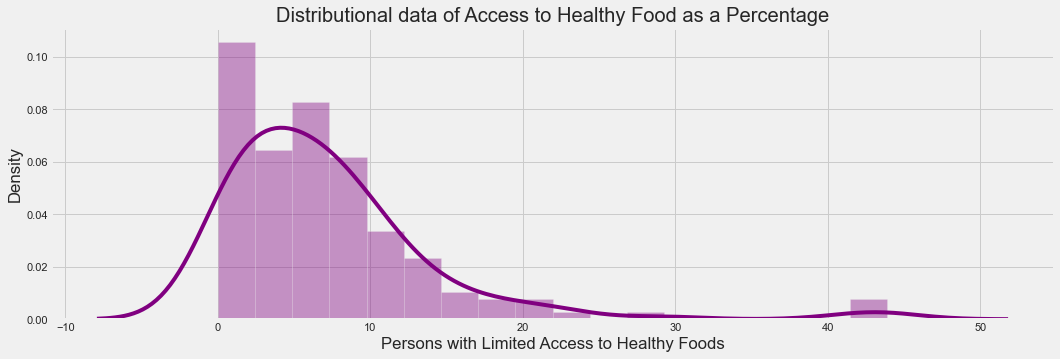

In [23]:
import matplotlib.style as style
style.use("fivethirtyeight")
f1, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df["Persons with Limited Access to Healthy Foods"], color="purple",ax = axes)
plt.title("Distributional data of Access to Healthy Food as a Percentage")

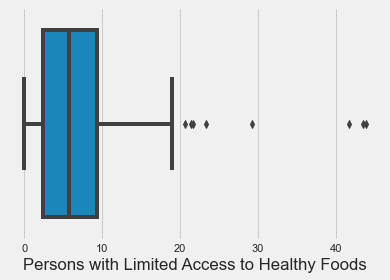

In [24]:
style.use("fivethirtyeight")
sns.boxplot(df["Persons with Limited Access to Healthy Foods"])


From the above plots, we can see that the median percentage for people with limited access to healthy food is around 5%. The interquartile range is about 7. We can see that the minimum value is close to 0 and the maximum value that is not an outlier is roughly 18. There are several outliers beyond 20 that we can see and these go up to above 40%! This could be due to several factors, including lack of proximity to affordable grocery stores, or a lack of investment into healthy eating in a variety of places for example schools etc. I'll dig further into this later in the notebook to see which counties have this issues and what other issues they may have that relate to this.

## Univariate Analysis: Access to Exercise Opportunities 

In [25]:
df['Persons with Access to Exercise Opportunities'] = [float(x) for x in df['Persons with Access to Exercise Opportunities'].values]


In [26]:
df['Persons with Access to Exercise Opportunities'] = 100 * df['Persons with Access to Exercise Opportunities']

Text(0.5, 1.0, 'Distributional data for Access to Exercise Opportunities as a Percentage')

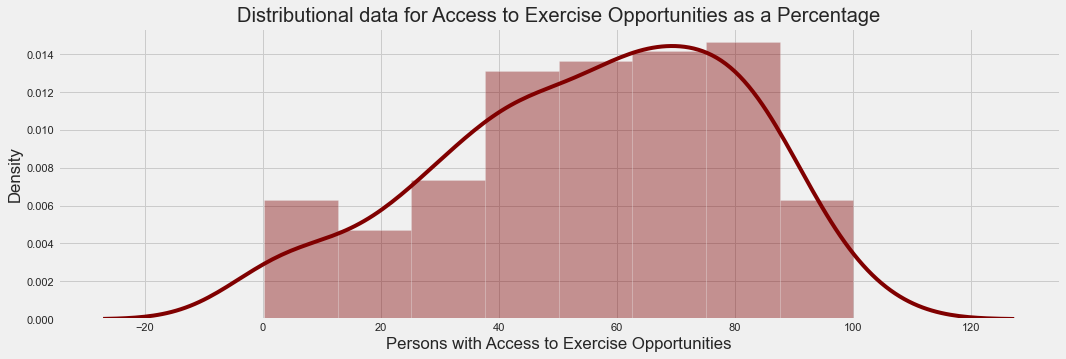

In [27]:
style.use("fivethirtyeight")
f2, axes = plt.subplots(1,1, figsize = (16, 5))
g2 = sns.distplot(df['Persons with Access to Exercise Opportunities'], color="maroon",ax = axes)
plt.title("Distributional data for Access to Exercise Opportunities as a Percentage")

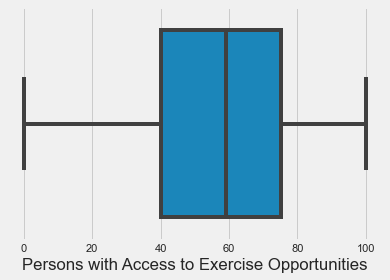

In [28]:
style.use("fivethirtyeight")
sns.boxplot(df['Persons with Access to Exercise Opportunities'])

As Expected, there seems to be more access to exercise oppertunities, but there are still several places where access to such oppertunities are limited. The interquartile range is close to 40, and the median is 60%. This could potentially hint at the notion that there are counties that do not do enough to create these opportunities for people, these could be due to a lack of free time, overworked employees, long commutes to and from work resulting in a lack of time or the government not investing enough in these opportunities resulting in a lack of gyms or lack of affordable exercise programs. I will explore these possibilities as well as their potential repercussions during a late part of this analysis.

## Univariate Analysis: Living in Food Insecurity (2017)

In [29]:
df['Percent lving in food insecurity (Country Health Rankings 2017)'] = [float(x) for x in df['Percent lving in food insecurity (Country Health Rankings 2017)'].values]


Text(0.5, 1.0, 'Distributional data of Food Insecurity')

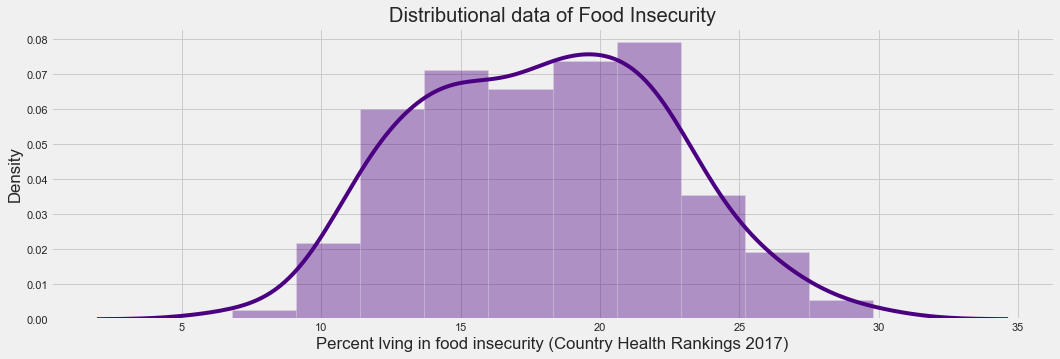

In [30]:
style.use("fivethirtyeight")
f3, axes = plt.subplots(1,1, figsize = (16, 5))
g3 = sns.distplot(df['Percent lving in food insecurity (Country Health Rankings 2017)'], color="Indigo",ax = axes)
plt.title("Distributional data of Food Insecurity")

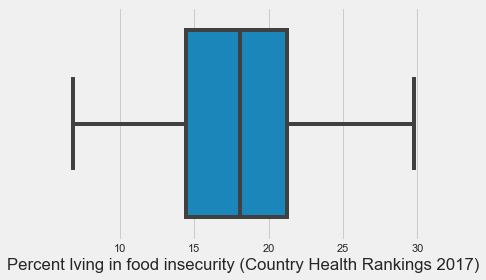

In [31]:
style.use("fivethirtyeight")
sns.boxplot(df['Percent lving in food insecurity (Country Health Rankings 2017)'])

Above we can see that the median percentage for people living in food insecurity across various counties in Georgia is about 18%. This is definately a massive issue as the percentage rises to close to 30% in some counties. Again, this could be due to a variety of factors that I will aim to explore and uncover. I will try to find other factors that correlate with this and potentially impact food insecurity which will hopefully lead to clearer next steps to eliminate this problem.

## Univariate Analysis: Poor Health Days (2017)

In [32]:
df['Avg Number of Poor Health Days (CountyhealthRanking 2017)'] = [float(x) for x in df['Avg Number of Poor Health Days (CountyhealthRanking 2017)'].values]


Text(0.5, 1.0, 'Distributional data For Sick Days Taken by Employees')

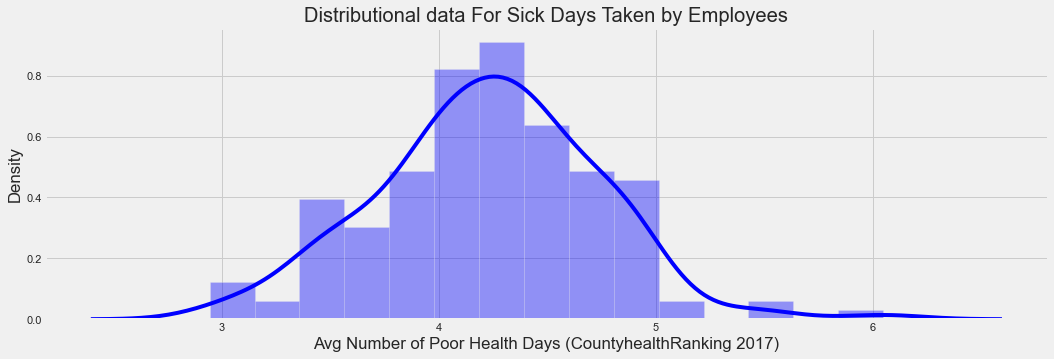

In [33]:
style.use("fivethirtyeight")
f4, axes = plt.subplots(1,1, figsize = (16, 5))
g4 = sns.distplot(df['Avg Number of Poor Health Days (CountyhealthRanking 2017)'], color="Blue",ax = axes)
plt.title("Distributional data For Sick Days Taken by Employees")

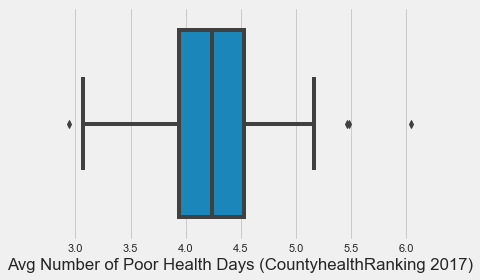

In [34]:
style.use("fivethirtyeight")
sns.boxplot(df['Avg Number of Poor Health Days (CountyhealthRanking 2017)'])

As you can see, there are several outliers on the larger end of the spectrum, I wonder if there is some correlation or relationship between the access to healthy food/ food insecurity and sick days taken by employees. Through this, we can show some economic benefits to making healthy food more accessible in certain counties. These are not huge outliers, and a correlation does not necessarily mean causation, so we will have to look more into this in later parts of the notebook.

## Univatiate Analysis: Long Commute to Work

In [35]:
df['Percent of those who drive alone and have a long comute (County Health Rankings 2017)'] = [float(x) for x in df['Percent of those who drive alone and have a long comute (County Health Rankings 2017)'].values]


Text(0.5, 1.0, 'Distributional data for Percentage of People with Long Commutes to Work')

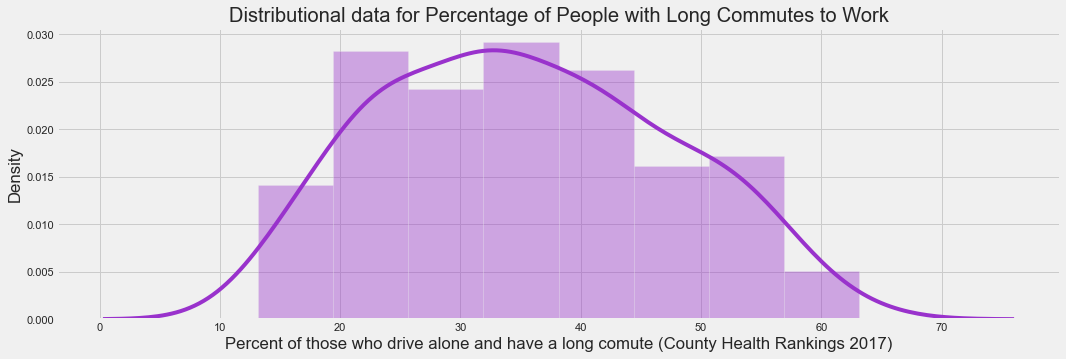

In [36]:
style.use("fivethirtyeight")
f4, axes = plt.subplots(1,1, figsize = (16, 5))
g4 = sns.distplot(df['Percent of those who drive alone and have a long comute (County Health Rankings 2017)'], color="darkorchid",ax = axes)
plt.title("Distributional data for Percentage of People with Long Commutes to Work")

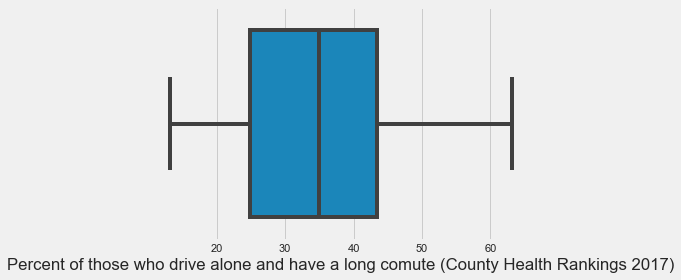

In [37]:
style.use("fivethirtyeight")
sns.boxplot(df['Percent of those who drive alone and have a long comute (County Health Rankings 2017)'])

As we can see, several people drive a long way to work, and this is only those who drive alone, so we can assume more people travel further out to work. This may be an indicator of a lack of resources in their area of residence, and thus may hint that people could also live further away from a grocery store or healthcare 

## Univariate Analysis: Diabetic Patients (2017)

In [38]:
df['Percent Diabetic (County Health Rankings 2017)'] = [float(x) for x in df['Percent Diabetic (County Health Rankings 2017)'].values]



Text(0.5, 1.0, 'Distributional data for Percentage of People with Diabetes')

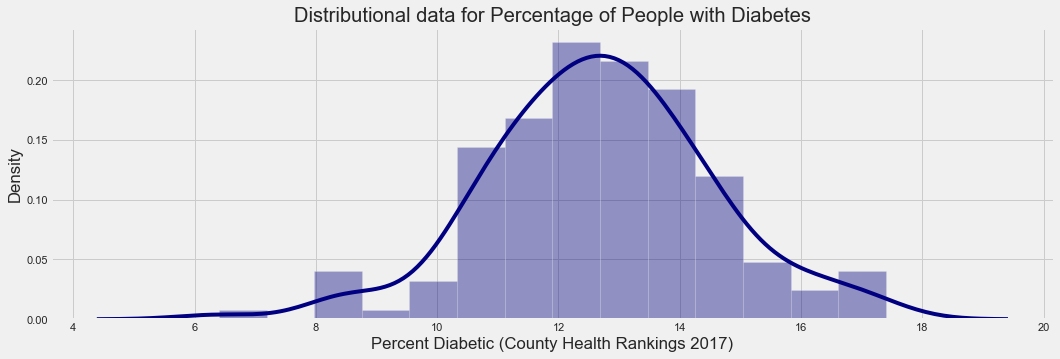

In [39]:
style.use("fivethirtyeight")
f4, axes = plt.subplots(1,1, figsize = (16, 5))
g4 = sns.distplot(df['Percent Diabetic (County Health Rankings 2017)'], color="navy",ax = axes)
plt.title("Distributional data for Percentage of People with Diabetes")

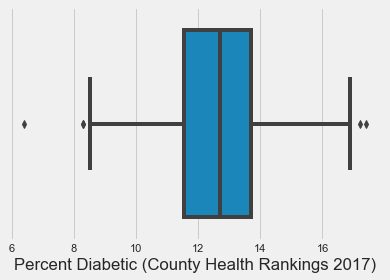

In [40]:
style.use("fivethirtyeight")
sns.boxplot(df['Percent Diabetic (County Health Rankings 2017)'])

## Univariate Analysis: Health Insurance Coverage

In [41]:
df['Number with Health Insurance Coverage (ACS 2014-2018)'] = [float(x) for x in df['Number with Health Insurance Coverage (ACS 2014-2018)'].values] 

Text(0.5, 1.0, 'Distributional data for Number of People with Insurance Coverage')

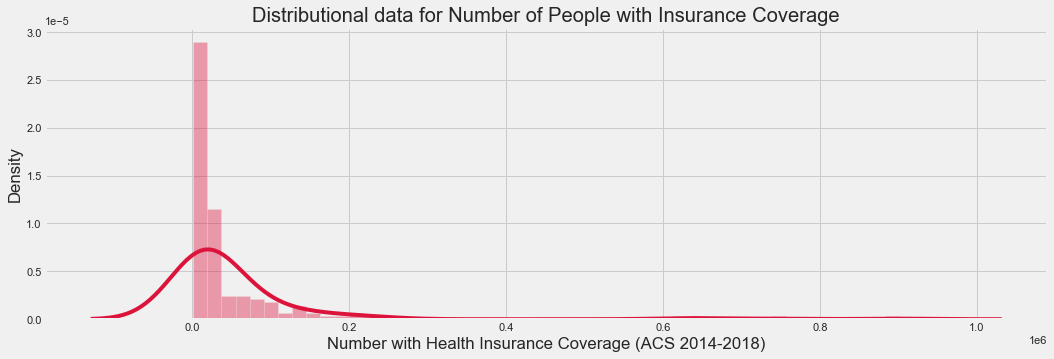

In [42]:
style.use("fivethirtyeight")
f4, axes = plt.subplots(1,1, figsize = (16, 5))
g4 = sns.distplot(df['Number with Health Insurance Coverage (ACS 2014-2018)'], color="crimson",ax = axes)
plt.title("Distributional data for Number of People with Insurance Coverage")

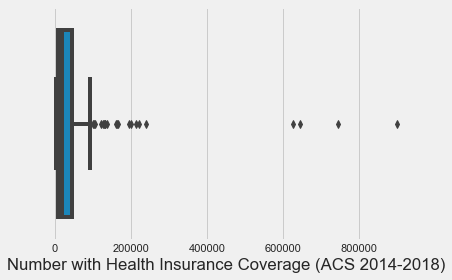

In [43]:
style.use("fivethirtyeight")
sns.boxplot(df['Number with Health Insurance Coverage (ACS 2014-2018)'])

# Data Viz and Trends Analysis - I'll clean all of these up once I get a general idea of what we can use for the story

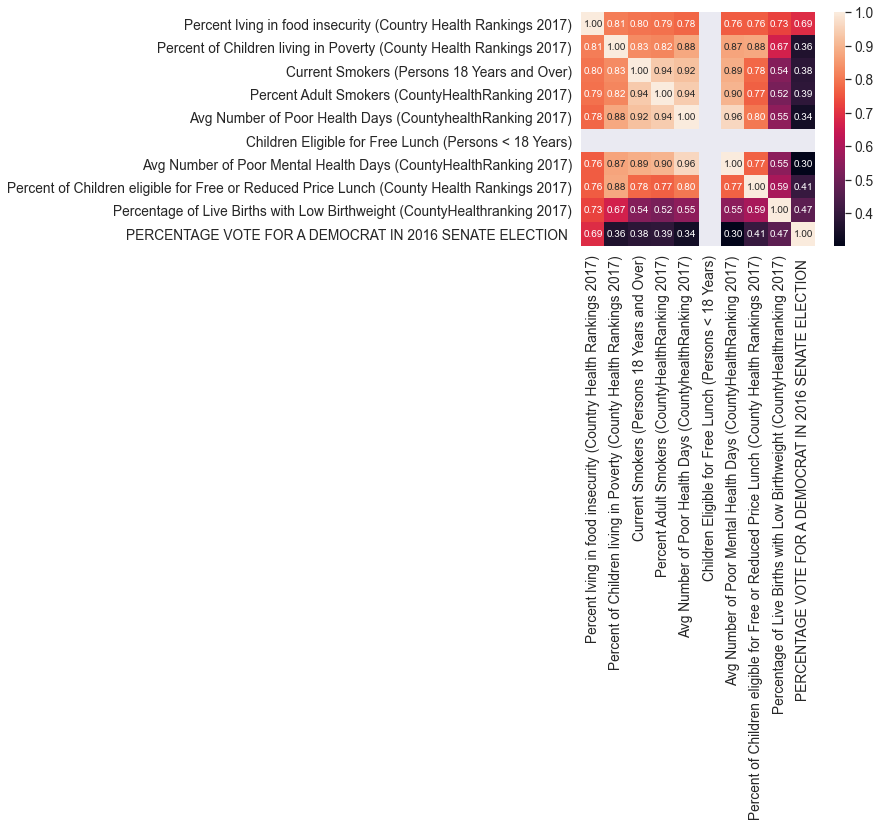

In [44]:
corrmat = df.corr()
k = 10
cols = corrmat.nlargest(k, 'Percent lving in food insecurity (Country Health Rankings 2017)')['Percent lving in food insecurity (Country Health Rankings 2017)'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10 }, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Limited Access to Healthy Foods

In [45]:
df['Persons with Limited Access to Healthy Foods'].dtypes

dtype('float64')

In [46]:
print(df['Persons with Limited Access to Healthy Foods'])

0       5.8
1      10.9
2       2.7
3      43.5
4       8.6
       ... 
154    12.3
155     0.4
156    16.6
157    10.6
158     6.4
Name: Persons with Limited Access to Healthy Foods, Length: 159, dtype: float64


In [47]:
df.shape

(159, 128)

In [48]:
df2 = df[df["Persons with Limited Access to Healthy Foods"] >= 20]

In [49]:
df2.head()

,State,County,Longitude,Lat,HOUSEHOLDS WITH INTERNET ACCESS (2014-2018),HYPERTIONSION DIAGNOSIS IN ADULTS (2017),HEART DISEASE DIAGNOSIS IN ADULTS (2017),DIABETES DIAGNOSIS FOR ADULTS (2017),HIGH CHOLESTEROL DIAGNOSIS IN ADULTS (2017),"CANCER INCIDENCE PER 100,000 PEOPLE (2011-2015)",DEPRESSION DIAGNOSIS RATE (2017),HIV DIAGNOSIS RATE (2016),RELIGIOUS ADHERENCE RATE (2010),VOTING AGE POPULATION TURNOUT RATE IN 2016 GENERAL ELECTION,PERCENTAGE VOTE FOR A DEMOCRAT IN 2016 SENATE ELECTION,PERCENTAGE VOTE FOR A REPUBLICAN IN 2016 SENATE ELECTION,TOTAL POPULATION (ACS 2014-2018),TOTAL POPULATION MALE (ACS 2014-2018),TOTAL POPULATION FEMALE (ACS 2014-2018),Under 5 Years - AGE RATE (ACS 2014-2018),5 to 9 Years - AGE RATE (ACS 2014-2018),10 to 14 Years - AGE RATE (ACS 2014-2018),15 to 17 Years- AGE RATE (ACS 2014-2018),18 to 24 Years - AGE RATE (ACS 2014-2018),25 to 34 Years- AGE RATE (ACS 2014-2018),35 to 44 Years - AGE RATE (ACS 2014-2018),45 to 54 Years- AGE RATE (ACS 2014-2018),55 to 64 Years - AGE RATE (ACS 2014-2018),65 to 74 Years - AGE RATE (ACS 2014-2018),75 to 84 Years- AGE RATE (ACS 2014-2018),85 Years and Over - AGE RATE (ACS 2014-2018),White Alone - RACE RATE (ACS 2014-2018),Black or African American Alone- RACE RATE (ACS 2014-2018),American Indian and Alaska Native Alone- RACE RATE (ACS 2014-2018),Asian Alone- RACE RATE (ACS 2014-2018),Native Hawaiian and Other Pacific Islander Alone- RACE RATE (ACS 2014-2018),Some Other Race Alone- RACE RATE (ACS 2014-2018),Two or More Races- RACE RATE (ACS 2014-2018),Population 16 Years and Over- EMPLOYMENT RATE (ACS 2014-2018),In Labor Force- EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- EMPLOYMENT RATE (ACS 2014-2018),Civilian:- EMPLOYMENT RATE (ACS 2014-2018),Employed- MALE EMPLOYMENT RATE (ACS 2014-2018),Unemployed- EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- EMPLOYMENT RATE (ACS 2014-2018),Male Population 16 Years and Over- MALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force:- MALE EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- MALE EMPLOYMENT RATE (ACS 2014-2018),Civilian:- MALE EMPLOYMENT RATE (ACS 2014-2018),Employed- MALE EMPLOYMENT RATE (ACS 2014-2018)2,Unemployed- MALE EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- MALE EMPLOYMENT RATE (ACS 2014-2018),Female Population 16 Years and Over:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Civilian:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Employed- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Unemployed- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force 16 Years and Over: LABOR FORCE RATE (ACS 2014-2018),In Armed Forces: LABOR FORCE RATE (ACS 2014-2018),Civilian: LABOR FORCE RATE (ACS 2014-2018),Civilian Population in Labor Force 16 Years and Over:- LABOR FORCE RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Employed- EMPLOYMENT RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Unemployed- UNEMPLOYMENT RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Households:-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018),"Less than $10,000-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$10,000 to $14,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$15,000 to $19,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$20,000 to $24,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$25,000 to $29,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$30,000 to $34,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$35,000 to $39,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$40,000 to $44,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$45,000 to $49,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$50,0

In [50]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [51]:
#a = np.intersect1d(df.columns, df1.columns)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

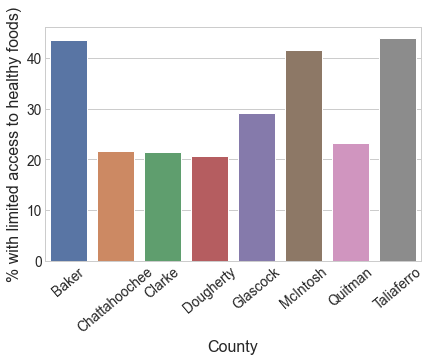

In [52]:
plt.style.use('seaborn-whitegrid')
ax1 = sns.barplot(x="County", y="Persons with Limited Access to Healthy Foods", data=df2, ci = None)
ax1.set_xlabel( "County" , size = 16 )
ax1.set_ylabel( "% with limited access to healthy foods)" , size = 16 )
plt.xticks(rotation=40)

The plot above shows the counties with an abnormally high percentage of the population that does not have access to healthy foods. Some counties have a percentage of over 40%, which is a major problem.

#### Adjust the axis scaling for the plots below

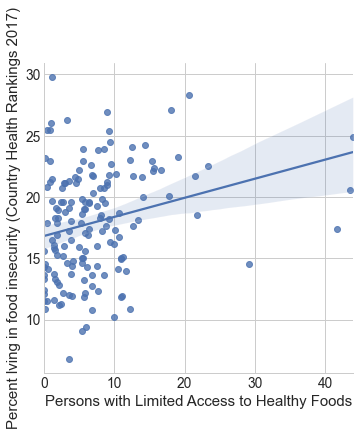

In [53]:
ax = sns.lmplot(x="Persons with Limited Access to Healthy Foods", y="Percent lving in food insecurity (Country Health Rankings 2017)", data=df)

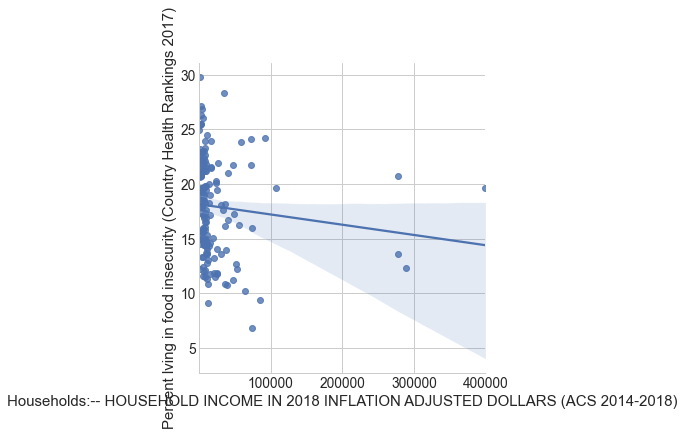

In [54]:
ax = sns.lmplot(x="Households:-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)", y="Percent lving in food insecurity (Country Health Rankings 2017)", data=df)
    
    

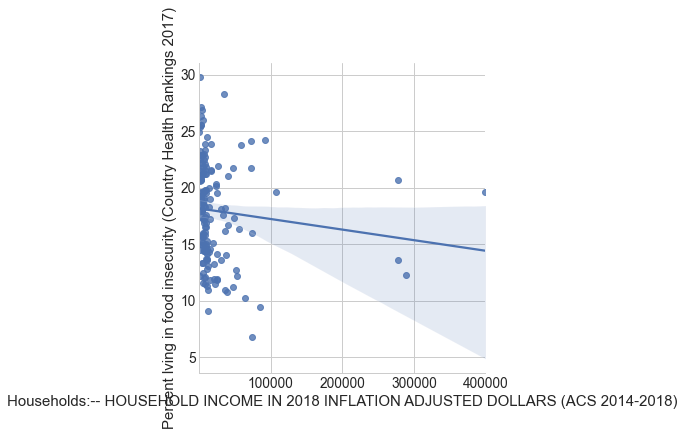

In [55]:
ax = sns.lmplot(x="Households:-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)", y="Percent lving in food insecurity (Country Health Rankings 2017)", data=df)

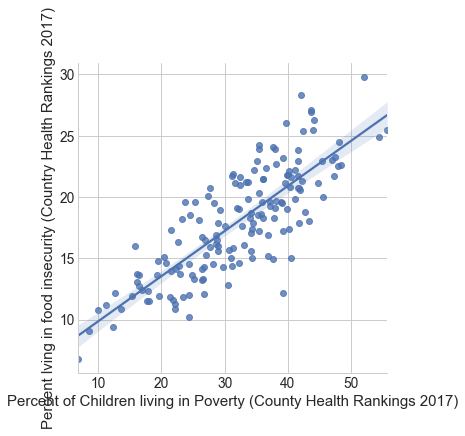

In [56]:
ax = sns.lmplot(x="Percent of Children living in Poverty (County Health Rankings 2017)", y="Percent lving in food insecurity (Country Health Rankings 2017)", data=df)

## Interesting Maps

In [57]:
 # Mapping this for all counties using geopandas point system

df_map = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')

In [58]:
df_map.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,Indiana,Fulton County,20737,10369,10368,9985,10020,9561,9627,19188,1549,No,7.47%,170,1%,965,4.65%
1,18051,Indiana,Gibson County,33458,16642,16816,15873,16117,15648,15955,31603,1855,No,5.54%,667,2%,476,1.42%
2,18053,Indiana,Grant County,69330,33282,36048,29587,32460,28353,31398,59751,9579,No,13.82%,4936,7%,2656,3.83%
3,18055,Indiana,Greene County,32940,16479,16461,16179,16167,16029,15999,32028,912,No,2.77%,82,0%,351,1.07%
4,18057,Indiana,Hamilton County,289495,141103,148392,125675,131785,120979,127105,248084,41411,No,14.30%,11332,4%,10548,3.64%


In [59]:
GA_map = df_map[df_map['STNAME']=='Georgia']

In [60]:
county_order = GA_map['CTYNAME'].to_list()
counties_norm = [" ".join(c.split()[:-1]) for c in county_order]

In [61]:
GA_map.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
2807,13001,Georgia,Appling County,18368,9294,9074,7197,7139,6284,6520,12804,5564,No,30.29%,3607,20%,1728,9.41%
2808,13003,Georgia,Atkinson County,8284,4203,4081,3291,3143,2317,2371,4688,3596,No,43.41%,1459,18%,2050,24.75%
2809,13005,Georgia,Bacon County,11198,5562,5636,4558,4592,4094,4273,8367,2831,No,25.28%,1790,16%,890,7.95%
2810,13007,Georgia,Baker County,3366,1606,1760,858,876,796,823,1619,1747,Yes,51.90%,1551,46%,152,4.52%
2811,13009,Georgia,Baldwin County,46367,23365,23002,13011,12750,12638,12391,25029,21338,No,46.02%,19150,41%,977,2.11%


In [62]:
GA_map = GA_map.assign(County=counties_norm)


In [63]:
df = df.set_index('County')
GA_map = GA_map.set_index('County')

In [64]:
len(set(GA_map.index)) == len(set(df.index))

True

In [65]:
GA_map = GA_map.join(df, how='inner', on='County')

In [66]:
list(GA_map.columns)

['FIPS',
 'STNAME',
 'CTYNAME',
 'TOT_POP',
 'TOT_MALE',
 'TOT_FEMALE',
 'WA_MALE',
 'WA_FEMALE',
 'NHWA_MALE',
 'NHWA_FEMALE',
 'NHWhite_Alone',
 'Not_NHWhite_Alone',
 'MinorityMinority',
 'MinorityPCT',
 'Black',
 'BlackPCT',
 'Hispanic',
 'HispanicPCT',
 'State',
 'Longitude',
 'Lat',
 'HOUSEHOLDS WITH INTERNET ACCESS (2014-2018)',
 'HYPERTIONSION DIAGNOSIS IN ADULTS (2017)',
 'HEART DISEASE DIAGNOSIS IN ADULTS (2017)',
 'DIABETES DIAGNOSIS FOR ADULTS (2017)',
 'HIGH CHOLESTEROL DIAGNOSIS IN ADULTS (2017)',
 'CANCER INCIDENCE PER 100,000 PEOPLE (2011-2015)',
 'DEPRESSION DIAGNOSIS RATE (2017)',
 'HIV DIAGNOSIS RATE (2016)',
 'RELIGIOUS ADHERENCE RATE (2010)',
 'VOTING AGE POPULATION TURNOUT RATE IN 2016 GENERAL ELECTION',
 'PERCENTAGE VOTE FOR A DEMOCRAT IN 2016 SENATE ELECTION ',
 'PERCENTAGE VOTE FOR A REPUBLICAN IN 2016 SENATE ELECTION ',
 'TOTAL POPULATION (ACS 2014-2018)',
 'TOTAL POPULATION MALE (ACS 2014-2018)',
 'TOTAL POPULATION FEMALE (ACS 2014-2018)',
 'Under 5 Years - AG

In [67]:
GA_map.shape

(159, 145)

In [68]:
GA_map.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT,State,Longitude,Lat,HOUSEHOLDS WITH INTERNET ACCESS (2014-2018),HYPERTIONSION DIAGNOSIS IN ADULTS (2017),HEART DISEASE DIAGNOSIS IN ADULTS (2017),DIABETES DIAGNOSIS FOR ADULTS (2017),HIGH CHOLESTEROL DIAGNOSIS IN ADULTS (2017),"CANCER INCIDENCE PER 100,000 PEOPLE (2011-2015)",DEPRESSION DIAGNOSIS RATE (2017),HIV DIAGNOSIS RATE (2016),RELIGIOUS ADHERENCE RATE (2010),VOTING AGE POPULATION TURNOUT RATE IN 2016 GENERAL ELECTION,PERCENTAGE VOTE FOR A DEMOCRAT IN 2016 SENATE ELECTION,PERCENTAGE VOTE FOR A REPUBLICAN IN 2016 SENATE ELECTION,TOTAL POPULATION (ACS 2014-2018),TOTAL POPULATION MALE (ACS 2014-2018),TOTAL POPULATION FEMALE (ACS 2014-2018),Under 5 Years - AGE RATE (ACS 2014-2018),5 to 9 Years - AGE RATE (ACS 2014-2018),10 to 14 Years - AGE RATE (ACS 2014-2018),15 to 17 Years- AGE RATE (ACS 2014-2018),18 to 24 Years - AGE RATE (ACS 2014-2018),25 to 34 Years- AGE RATE (ACS 2014-2018),35 to 44 Years - AGE RATE (ACS 2014-2018),45 to 54 Years- AGE RATE (ACS 2014-2018),55 to 64 Years - AGE RATE (ACS 2014-2018),65 to 74 Years - AGE RATE (ACS 2014-2018),75 to 84 Years- AGE RATE (ACS 2014-2018),85 Years and Over - AGE RATE (ACS 2014-2018),White Alone - RACE RATE (ACS 2014-2018),Black or African American Alone- RACE RATE (ACS 2014-2018),American Indian and Alaska Native Alone- RACE RATE (ACS 2014-2018),Asian Alone- RACE RATE (ACS 2014-2018),Native Hawaiian and Other Pacific Islander Alone- RACE RATE (ACS 2014-2018),Some Other Race Alone- RACE RATE (ACS 2014-2018),Two or More Races- RACE RATE (ACS 2014-2018),Population 16 Years and Over- EMPLOYMENT RATE (ACS 2014-2018),In Labor Force- EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- EMPLOYMENT RATE (ACS 2014-2018),Civilian:- EMPLOYMENT RATE (ACS 2014-2018),Employed- MALE EMPLOYMENT RATE (ACS 2014-2018),Unemployed- EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- EMPLOYMENT RATE (ACS 2014-2018),Male Population 16 Years and Over- MALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force:- MALE EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- MALE EMPLOYMENT RATE (ACS 2014-2018),Civilian:- MALE EMPLOYMENT RATE (ACS 2014-2018),Employed- MALE EMPLOYMENT RATE (ACS 2014-2018)2,Unemployed- MALE EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- MALE EMPLOYMENT RATE (ACS 2014-2018),Female Population 16 Years and Over:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Armed Forces- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Civilian:- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Employed- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Unemployed- FEMALE EMPLOYMENT RATE (ACS 2014-2018),Not in Labor Force- FEMALE EMPLOYMENT RATE (ACS 2014-2018),In Labor Force 16 Years and Over: LABOR FORCE RATE (ACS 2014-2018),In Armed Forces: LABOR FORCE RATE (ACS 2014-2018),Civilian: LABOR FORCE RATE (ACS 2014-2018),Civilian Population in Labor Force 16 Years and Over:- LABOR FORCE RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Employed- EMPLOYMENT RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Unemployed- UNEMPLOYMENT RATE FOR 16 YEARS AND OVER POPULATION (ACS 2014-2018),Households:-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018),"Less than $10,000-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$10,000 to $14,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$15,000 to $19,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$20,000 to $24,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$25,000 to $29,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$30,000 to $34,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$35,000 to $39,999-- HOUSEHOLD INCOME IN 2018 INFLATION ADJUSTED DOLLARS (ACS 2014-2018)","$40,000 t

In [69]:
def trans_percent(s: str) -> float:
    return float(s[:-1])

def trans_number_with_commas(s: str) -> float:
    return float(s.replace(',',''))

def transform(col_name, missing_fill=np.nan):
    col_data = GA_map[col_name].tolist()
    is_pc = any([isinstance(d, str) and d[-1] == '%' for d in col_data])
    if is_pc:
        tf = trans_percent
    else:
        # assume float
        tf = trans_number_with_commas
    return [tf(s) if isinstance(s, str) else missing_fill for s in GA_map[col_name]]    

In [70]:
def make_plot(fips, values, num_bins, title):
    endpts = list(np.mgrid[min(values):max(values):(num_bins+1)*1j])
    fig = ff.create_choropleth(
        fips=fips, values=values, scope=['Georgia'], show_state_data=True,
        #colorscale="Reds", #colorscale,
        binning_endpoints=endpts, round_legend_values=True,
        plot_bgcolor='rgb(229,229,229)',
        paper_bgcolor='rgb(229,229,229)',
        legend_title=title,
        county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
        exponent_format=False,
    )
    fig.layout.template = None
    hover_ix, hover = [(ix, t) for ix, t in enumerate(fig['data']) if t.text][0]
    if len(hover['text']) != len(GA_map):
        # hack fixes to hovertext while waiting on Issue 1429 to be fixed
        # https://github.com/plotly/plotly.py/issues/1429#issuecomment-506925578
        ht = pd.Series(hover['text'])

        no_dupe_ix = ht.index[~ht.duplicated()]

        hover_x_deduped = np.array(hover['x'])[no_dupe_ix]
        hover_y_deduped = np.array(hover['y'])[no_dupe_ix]

        new_hover_x = [x if type(x) == float else x[0] for x in hover_x_deduped]
        new_hover_y = [y if type(y) == float else y[0] for y in hover_y_deduped]

        fig['data'][hover_ix]['text'] = ht.drop_duplicates()
        fig['data'][hover_ix]['x'] = new_hover_x
        fig['data'][hover_ix]['y'] = new_hover_y
    fig.show()

In [71]:
fips = GA_map['FIPS'].tolist()

In [72]:
title = "Households earning less than $10,000 a year"
values =   100*np.array(transform('85 Years and Over - AGE RATE (ACS 2014-2018)'), 0) / GA_map['TOT_POP'].values
num_bins = 8


TypeError: data type not understood

In [ ]:
make_plot(fips, values, num_bins, title)